# week5: dimension reduction & data visualization


# 介紹


## 為什麼我們需要降維?

- 較少的複雜度
- 節省存儲空間 & 計算時間
- 減少資料中雜訊 & 多餘特徵，提高模型的準確性
- 算法由於數據較少而訓練得更快
- 減少特徵維度可以更快且更直觀地視覺化資料



## 降維的缺點
- 在過程中會失去某些資訊，有可能影響模型結果。
- 降維方法需要額外的運算成本。
- 轉換後的特徵不好解釋。

## 降維技術

### **Feature Selection**
特徵選擇（Feature selection) 是從原始特徵集合中挑選最有代表性和重要性的特徵子集，並刪除不必要的特徵。這種方法通常基於統計指標或機器學習模型對特徵的重要性進行篩選。特徵選擇的優點在於可以保留原始特徵的解釋性，並且計算開銷相對較小，但可能會忽略特徵之間的交互作用。
<p align="center">
    <img src="https://media.springernature.com/full/springer-static/image/art%3A10.1186%2Fs13059-021-02544-3/MediaObjects/13059_2021_2544_Fig1_HTML.png?as=webp" width="80%"/>
</p>




<p align="right">
    <a href='https://genomebiology.biomedcentral.com/articles/10.1186/s13059-021-02544-3'>
    source
    </a>
</p>


**常見的特徵選擇方法包括**：

- **Filter方法**：基於特徵本身的統計指標或相關性進行特徵篩選，常見的指標包括變異數分析(ANOVA)、卡方檢驗(Chi-Squared Test)、相關性係數(Pearson’s Correlation) 等。這些方法不依賴於任何具體的模型，因此計算成本相對較小，但可能會忽略特徵之間的交互作用。
    - 補充: The statistical measures used in filter-based feature selection are generally calculated one input variable at a time with the target variable. As such, they are referred to as univariate statistical measures. This may mean that any interaction between input variables is not considered in the filtering process.

<p align="center">
    <img src="https://www.analyticsindiamag.com/wp-content/uploads/2019/04/filte.jpg" width="80%"/>
</p>

<p align="right">
    <a href='https://www.kaggle.com/code/piyushagni5/feature-selection-techniques-in-machine-learning'>
    source
    </a>
</p>

- **Wrapper方法**：基於特徵子集的性能進行特徵篩選，常見的方法包括遞歸特徵消除(recursive Feature Elimination)、前向選擇(Forward Feature Selection)和後向消除(Backward feature elimination)等。這些方法需要結合具體的模型進行特徵選擇，因此計算開銷相對較大，但可以考慮特徵之間的交互作用。

<p align="center">
    <img src="https://www.analyticsvidhya.com/wp-content/uploads/2016/11/Wrapper_1.png" width="80%"/>
</p>

<p align="right">
    <a href='https://www.kaggle.com/code/piyushagni5/feature-selection-techniques-in-machine-learning'>
    source
    </a>
</p>


- **Embedded方法**：基於具體的模型訓練過程中進行特徵篩選，常見的方法包括 L1 regularization of Lasso regressio、 L2 regularization、決策樹中(decision tree)的特徵重要性等。這些方法不需要額外的特徵選擇過程，可以直接嵌入到模型中進行訓練，因此計算開銷相對較小，但可能會受到具體模型的限制。

<p align="center">
    <img src="https://www.analyticsvidhya.com/wp-content/uploads/2016/11/Embedded_1.png" width="80%"/>
</p>

<p align="right">
    <a href='https://www.analyticsvidhya.com/wp-content/uploads/2016/11/Embedded_1.png'>
    source
    </a>
</p>


### **Feature Extraction**
特徵提取（Feature extraction）是通過將原始特徵轉換為新的低維特徵空間來實現維度縮減，這些新的特徵通常是原始特徵的線性或非線性組合。常見的特徵提取方法包括主成分分析（PCA）、t-分佈式隨機鄰居嵌入(t-SNE)、獨立成分分析（ICA）和線性判別分析（LDA）等。特徵提取的優點在於可以保留特徵之間的交互作用，並且可以消除原始特徵之間的冗餘信息，但可能會失去原始特徵的解釋性。

#### **PCA**
<p align="center">
    <img src="https://miro.medium.com/v2/resize:fit:720/format:webp/1*vfLvJF8wHaQjDaWv6Mab2w.png" width="90%"/>
</p>

<p align="right">
    <a href='https://medium.com/@TheDataGyan/dimensionality-reduction-with-pca-and-t-sne-in-r-2715683819'>
    source
    </a>
</p>

#### **t-SNE**
<p align="center">
    <img src="https://www.researchgate.net/publication/348640387/figure/fig3/AS:982239047331840@1611195446550/t-SNE-visualization-of-the-latent-features-extracted-from-the-proposed-representation.ppm" width="90%"/>
</p>

<p align="right">
    <a href='https://www.researchgate.net/figure/t-SNE-visualization-of-the-latent-features-extracted-from-the-proposed-representation_fig3_348640387'>
    source
    </a>
</p>




# 準備

## 用到的 function & package

```
pandas=1.5.3
numpy=1.22.4
seaborn=0.12.2
matplotlib=3.7.1
scikit-learn=1.2.2
```

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import classification_report

## 範例資料集: Breast Cancer Wisconsin (Diagnostic) Data Set

In [ ]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [ ]:
print('Dataset features names : ', '、'.join(data.feature_names))
print('Dataset features size : ', data.data.shape)
print('Dataset target names : ', '、'.join(data.target_names))
print('Dataset target size : ', data.target.shape)

Dataset features names :  mean radius、mean texture、mean perimeter、mean area、mean smoothness、mean compactness、mean concavity、mean concave points、mean symmetry、mean fractal dimension、radius error、texture error、perimeter error、area error、smoothness error、compactness error、concavity error、concave points error、symmetry error、fractal dimension error、worst radius、worst texture、worst perimeter、worst area、worst smoothness、worst compactness、worst concavity、worst concave points、worst symmetry、worst fractal dimension
Dataset features size :  (569, 30)
Dataset target names :  malignant、benign
Dataset target size :  (569,)


In [ ]:
# 轉換成 dataframe 只是方便觀察，非必要動作
df = pd.DataFrame(data.data, columns=data.feature_names)
df['diagnosis'] = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## 初始結果 (0.95)

In [ ]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

# SVM with all features
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

clf_test_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_true=y_test, y_pred=clf_test_pred, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        45
      benign       0.96      0.96      0.96        69

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



# Feature Selection

## Filter

### 相關性係數(Pearson’s Correlation)



<p align="center">
    <img src="https://editor.analyticsvidhya.com/uploads/39170Formula.JPG" width="70%"/>
</p>



<p align="center">
    <img src="https://editor.analyticsvidhya.com/uploads/25513Correlation.JPG" width="90%"/>
</p>

<p align="right">
    <a href='https://editor.analyticsvidhya.com/uploads/25513Correlation.JPG'>
    source
    </a>
</p>


plot by [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

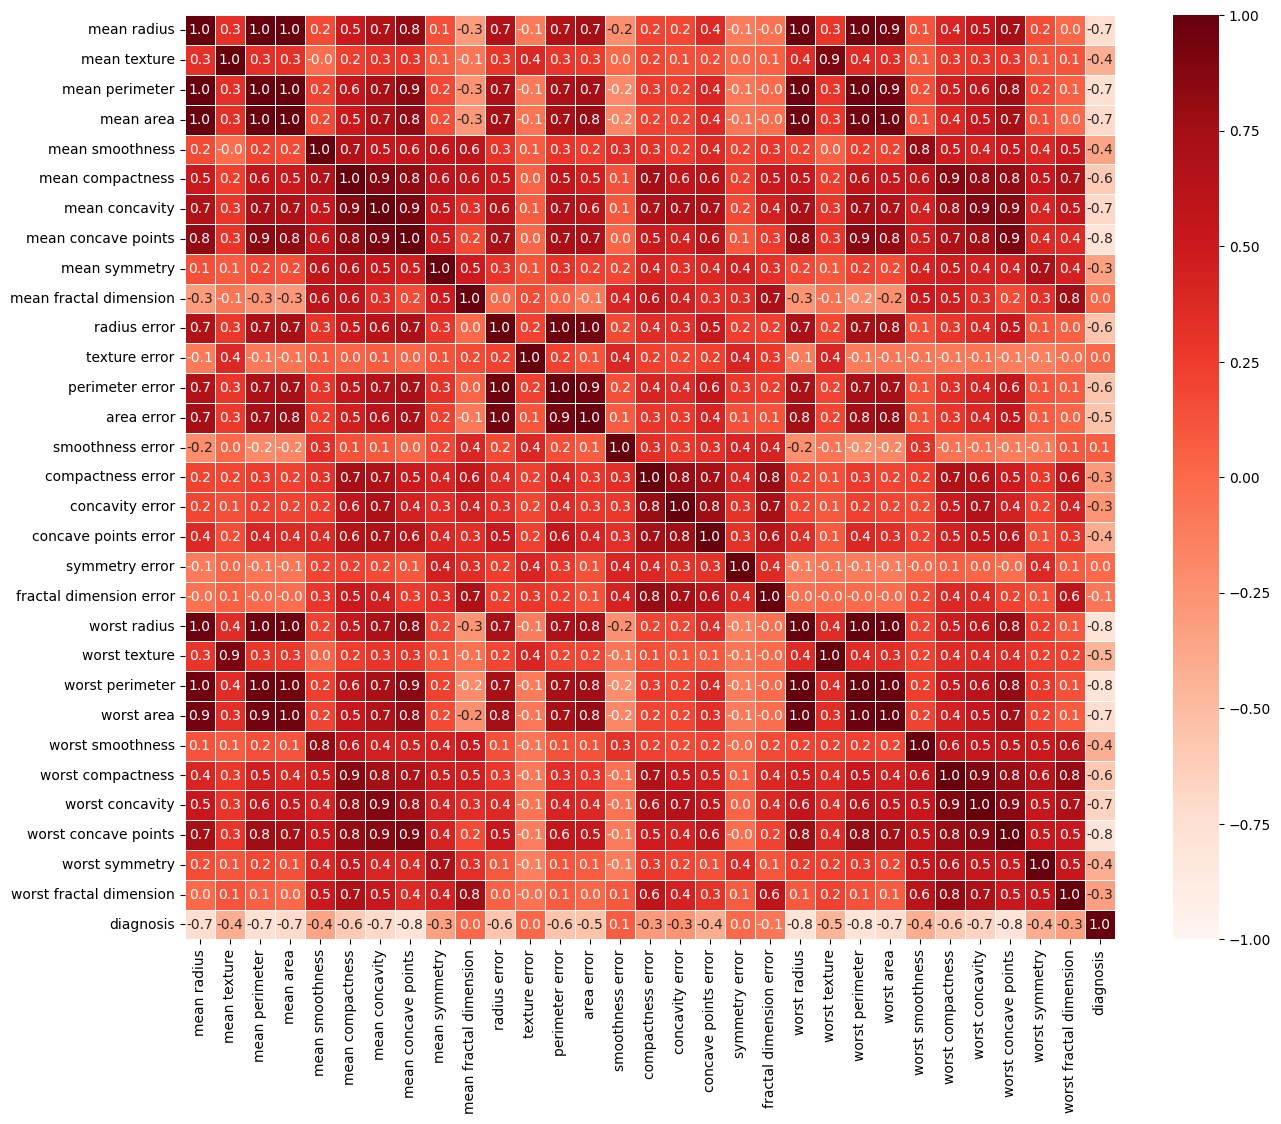

In [ ]:
featuresCorr = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(featuresCorr, annot=True, cmap=plt.cm.Reds, vmax=1, vmin=-1, fmt=".1f", linewidth=0.5)
plt.show()

**threshold 0.5**

In [ ]:
# 相關係數 > 0.5 or < -0.5 的特徵
targetCorr = abs(featuresCorr['diagnosis'])
targetCorr = targetCorr.drop('diagnosis')
selectedFeatures = targetCorr[targetCorr>0.5]
print(f"Number of selected features: {len(selectedFeatures)} \n\nHighly relative feature list:\n{selectedFeatures}")

Number of selected features: 15 

Highly relative feature list:
mean radius             0.730029
mean perimeter          0.742636
mean area               0.708984
mean compactness        0.596534
mean concavity          0.696360
mean concave points     0.776614
radius error            0.567134
perimeter error         0.556141
area error              0.548236
worst radius            0.776454
worst perimeter         0.782914
worst area              0.733825
worst compactness       0.590998
worst concavity         0.659610
worst concave points    0.793566
Name: diagnosis, dtype: float64


In [ ]:
# SVM with selected features
corr_select_clf = SVC(kernel='linear')
corr_select_clf.fit(X_train[list(selectedFeatures.keys())], y_train)

corr_select_pred = corr_select_clf.predict(X_test[list(selectedFeatures.keys())])
print(classification_report(y_true=y_test, y_pred=corr_select_pred, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.87      0.91      0.89        45
      benign       0.94      0.91      0.93        69

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



**threshold 0.7**

In [ ]:
# 相關係數 > 0.5 or < -0.5 的特徵
targetCorr = abs(featuresCorr['diagnosis'])
targetCorr = targetCorr.drop('diagnosis')
selectedFeatures = targetCorr[targetCorr>0.7]
print(f"Number of selected features: {len(selectedFeatures)} \n\nHighly relative feature list:\n{selectedFeatures}")

Number of selected features: 8 

Highly relative feature list:
mean radius             0.730029
mean perimeter          0.742636
mean area               0.708984
mean concave points     0.776614
worst radius            0.776454
worst perimeter         0.782914
worst area              0.733825
worst concave points    0.793566
Name: diagnosis, dtype: float64


In [ ]:
# SVM with selected features
corr_select_clf = SVC(kernel='linear')
corr_select_clf.fit(X_train[list(selectedFeatures.keys())], y_train)

corr_select_pred = corr_select_clf.predict(X_test[list(selectedFeatures.keys())])
print(classification_report(y_true=y_test, y_pred=corr_select_pred, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.88      0.93      0.90        45
      benign       0.95      0.91      0.93        69

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



可以發現結果不一定會較好，這會牽扯到模型本身變數間的干擾程度。但是當特徵數量 or 資料量更多時還是可以藉此方法減少模型的計算時間。

### Univariate feature selection - 卡方檢驗(Chi-Squared Test)
- 根據統計上的標準，選取 Top N 個特徵，或是前 M% 的特徵
統計標準分類。
- 關於 Univariate feature selection 在 sklearn 上提供許多其他方法，詳細可以參考這邊 [1.13. Feature selection — scikit-learn 1.2.2 documentation](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection)，這邊先以卡方檢驗為例。



<p align="center">
    <img src="https://uploads-ssl.webflow.com/62d43457cb6098decea79498/62e5b2597fe912490029aeed_G-12-01.png" width="90%"/>
</p>

<p align="right">
    <a href='https://fruitful.appleandbanana.org/guide/g-12'>
    source
    </a>
</p>

**每個特徵分別對 target 欄位計算卡方**




In [ ]:
from sklearn.feature_selection import chi2

In [ ]:
chi2, p_value = chi2(X_train, y_train)

得到欄位的卡方與 p-values 值

In [ ]:
chi_df = pd.DataFrame({'feature': data.feature_names, 'chi-squares test': chi2, 'p-value':p_value})
chi_df['p-value'] = chi_df['p-value'].round(4)
chi_df = chi_df.sort_values('chi-squares test', ascending=False)
chi_df.style.background_gradient(cmap='Blues')

,feature,chi-squares test,p-value
23,worst area,87201.723550,0.000000
3,mean area,43152.315340,0.000000
13,area error,7047.294870,0.000000
22,worst perimeter,2840.769206,0.000000
2,mean perimeter,1595.971794,0.000000
20,worst radius,381.858114,0.000000
0,mean radius,211.116327,0.000000
12,perimeter error,203.954980,0.000000
21,worst texture,140.602165,0.000000
1,mean texture,73.685242,0.000000


**SelectKBest + chi2**

**Top 20**

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

chi2Filter = SelectKBest(chi2, k=20)
chi2Filter.fit(X_train, y_train)

# 選取完的 top 20 特徵
X_train_new = chi2Filter.transform(X_train)
X_test_new = chi2Filter.transform(X_test)

In [ ]:
print('train shape:', X_train_new.shape)
print('test shape:', X_test_new.shape)

train shape: (455, 20)
test shape: (114, 20)


In [ ]:
chi2Filter.get_feature_names_out()

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean compactness', 'mean concavity', 'mean concave points',
       'radius error', 'perimeter error', 'area error',
       'compactness error', 'concavity error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry'], dtype=object)

In [ ]:
clf = SVC(kernel='linear')
clf.fit(X_train_new, y_train)

chi2_select_pred_20 = clf.predict(X_test_new)
print(classification_report(y_true=y_test, y_pred=chi2_select_pred_20, target_names=data.target_names))


              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        45
      benign       0.96      0.96      0.96        69

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



**Top 10**

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

chi2Filter = SelectKBest(chi2, k=10)
chi2Filter.fit(X_train, y_train)

# 選取完的 top 10 特徵
X_train_new = chi2Filter.transform(X_train)
X_test_new = chi2Filter.transform(X_test)

In [ ]:
print('train shape:', X_train_new.shape)
print('test shape:', X_test_new.shape)

train shape: (455, 10)
test shape: (114, 10)


In [ ]:
chi2Filter.get_feature_names_out()

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'perimeter error', 'area error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area'], dtype=object)

In [ ]:
clf = SVC(kernel='linear')
clf.fit(X_train_new, y_train)

chi2_select_pred_10 = clf.predict(X_test_new)
print(classification_report(y_true=y_test, y_pred=chi2_select_pred_10, target_names=data.target_names))


              precision    recall  f1-score   support

   malignant       0.93      0.91      0.92        45
      benign       0.94      0.96      0.95        69

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



可以看到卡方只需要 top 10 的特徵，就可以達到和使用全部資料差不多結果。

## Wrapper

### 前向選擇(Forward Feature Selection)

<p align="center">
    <img src="https://www.researchgate.net/profile/Ahmed-Alsayat/publication/360323986/figure/fig2/AS:1155214958698551@1652436117553/Example-of-forward-stepwise-selection-with-five-variables-43.jpg" width="60%"/>
</p>

<p align="right">
    <a href='https://www.researchgate.net/figure/Example-of-forward-stepwise-selection-with-five-variables-43_fig2_360323986'>
    source
    </a>
</p>


可以在 `scoring` 參數下設定要使用甚麼指標來衡量，範例這邊選擇使用 recall。

**Top 10 - recall**

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

# 需要基於一個分類器
clf = SVC(kernel='linear')
forward_select_clf = SequentialFeatureSelector(clf, scoring='recall', n_features_to_select=10)
forward_select_clf.fit(X_train, y_train)

SequentialFeatureSelector(estimator=SVC(kernel='linear'),
                          n_features_to_select=10, scoring='recall')

In [ ]:
# 一樣可以 get_feature_names_out 取得 top10 特徵
forward_select_clf.get_feature_names_out()

array(['mean smoothness', 'mean concave points', 'mean symmetry',
       'mean fractal dimension', 'texture error', 'smoothness error',
       'compactness error', 'concavity error', 'concave points error',
       'symmetry error'], dtype=object)

In [ ]:
# 選擇 top 10 的特徵
X_train_new = forward_select_clf.transform(X_train)
X_test_new = forward_select_clf.transform(X_test)

In [ ]:
print('train shape:', X_train_new.shape)
print('test shape:', X_test_new.shape)

train shape: (455, 10)
test shape: (114, 10)


In [ ]:
# 重新 fit 一個分類器
clf = SVC(kernel='linear')
clf.fit(X_train_new, y_train)

forward_select_pred_10 = clf.predict(X_test_new)
print(classification_report(y_true=y_test, y_pred=forward_select_pred_10, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.86      0.13      0.23        45
      benign       0.64      0.99      0.77        69

    accuracy                           0.65       114
   macro avg       0.75      0.56      0.50       114
weighted avg       0.72      0.65      0.56       114



可以看到在本次任務上選擇 recall 為基準選擇特徵最後結果會很差。

**Top 10 - accuracy**

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

# 需要基於一個分類器
clf = SVC(kernel='linear')
forward_select_clf = SequentialFeatureSelector(clf, scoring='accuracy', n_features_to_select=10)
forward_select_clf.fit(X_train, y_train)

# 選擇 top 10 的特徵
X_train_new = forward_select_clf.transform(X_train)
X_test_new = forward_select_clf.transform(X_test)

print('train shape:', X_train_new.shape)
print('test shape:', X_test_new.shape)

train shape: (455, 10)
test shape: (114, 10)


In [ ]:
# 重新 fit 一個分類器
clf = SVC(kernel='linear')
clf.fit(X_train_new, y_train)

forward_select_pred_10 = clf.predict(X_test_new)
print(classification_report(y_true=y_test, y_pred=forward_select_pred_10, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.91      0.93      0.92        45
      benign       0.96      0.94      0.95        69

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



選擇 accuracy 在本次的任務上比較有幫助。

### 後向消除(Backward feature elimination)

<p align="center">
    <img src="https://www.researchgate.net/profile/Ahmed-Alsayat/publication/360323986/figure/fig3/AS:1155214958706751@1652436117578/Example-of-backward-stepwise-deletion-with-five-variables-43.jpg" width="60%"/>
</p>

<p align="right">
    <a href='https://www.researchgate.net/figure/Example-of-backward-stepwise-deletion-with-five-variables-43_fig3_360323986'>
    source
    </a>
</p>


在 sklearn 中一樣是使用 SequentialFeatureSelector 涵式，要記得將 `direction` 參數調為 backward

**Top 10 - accuracy**



In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

# 需要基於一個分類器
clf = SVC(kernel='linear')
backward_select_clf = SequentialFeatureSelector(clf, scoring='accuracy', direction='backward', n_features_to_select=10)
backward_select_clf.fit(X_train, y_train)

# 選擇 top 10 的特徵
X_train_new = backward_select_clf.transform(X_train)
X_test_new = backward_select_clf.transform(X_test)

print('train shape:', X_train_new.shape)
print('test shape:', X_test_new.shape)

train shape: (455, 10)
test shape: (114, 10)


In [ ]:
# 重新 fit 一個分類器
clf = SVC(kernel='linear')
clf.fit(X_train_new, y_train)

backward_select_pred_10 = clf.predict(X_test_new)
print(classification_report(y_true=y_test, y_pred=backward_select_pred_10, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.85      0.89      0.87        45
      benign       0.93      0.90      0.91        69

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.90      0.89      0.90       114



backward 的結果較差

## Embedded

### Regression


<p align="center">
    <img src="https://res.cloudinary.com/dyd911kmh/image/upload/v1648205672/image18_a3zz7y.png" width="70%"/>
</p>

<p align="right">
    <a href='https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression'>
    source
    </a>
</p>


#### LASSO(L1)

In [ ]:
from sklearn.linear_model import Lasso

LASSO_regress_select = SelectFromModel(Lasso(alpha=100))
LASSO_regress_select.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=100))

In [ ]:
# 可以看每個特徵的係數
lasso_coef_df = pd.DataFrame({'Feature': data.feature_names, 'LASSO': LASSO_regress_select.estimator_.coef_})
lasso_coef_df.style.background_gradient(cmap='Blues')

,Feature,LASSO
0,mean radius,-0.000000
1,mean texture,-0.000000
2,mean perimeter,-0.000000
3,mean area,-0.000000
4,mean smoothness,-0.000000
5,mean compactness,-0.000000
6,mean concavity,-0.000000
7,mean concave points,-0.000000
8,mean symmetry,-0.000000
9,mean fractal dimension,-0.000000


In [ ]:
# get_feature_names_out 取得特徵
LASSO_regress_select.get_feature_names_out()

array(['worst area'], dtype=object)

In [ ]:
X_train_new = LASSO_regress_select.transform(X_train)
X_test_new = LASSO_regress_select.transform(X_test)

print('train shape:', X_train_new.shape)
print('test shape:', X_test_new.shape)

train shape: (455, 1)
test shape: (114, 1)


In [ ]:
# 重新 fit 一個分類器
clf = SVC(kernel='linear')
clf.fit(X_train_new, y_train)

LASSO_select_pred = clf.predict(X_test_new)
print(classification_report(y_true=y_test, y_pred=LASSO_select_pred, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.85      0.89      0.87        45
      benign       0.93      0.90      0.91        69

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.90      0.89      0.90       114



#### Ridge(L2)

In [ ]:
from sklearn.linear_model import Ridge

Ridge_regress_select = SelectFromModel(Ridge(alpha=100))
Ridge_regress_select.fit(X_train, y_train)

SelectFromModel(estimator=Ridge(alpha=100))

In [ ]:
# 可以看每個特徵的係數
ridge_coef_df = pd.DataFrame({'Feature': data.feature_names, 'Ridge': Ridge_regress_select.estimator_.coef_})
ridge_coef_df = ridge_coef_df.sort_values('Ridge', ascending=False).reset_index(drop=True)
ridge_coef_df.style.background_gradient(cmap='Blues')

,Feature,Ridge
0,mean radius,0.022013
1,mean texture,0.011674
2,worst area,0.000567
3,mean area,0.000468
4,fractal dimension error,-0.000257
5,area error,-0.000377
6,concave points error,-0.000791
7,smoothness error,-0.000803
8,symmetry error,-0.001009
9,compactness error,-0.001200


In [ ]:
# get_feature_names_out 取得特徵
Ridge_regress_select.get_feature_names_out()

array(['mean radius', 'mean texture', 'mean concavity', 'radius error',
       'perimeter error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry'], dtype=object)

In [ ]:
X_train_new = Ridge_regress_select.transform(X_train)
X_test_new = Ridge_regress_select.transform(X_test)

print('train shape:', X_train_new.shape)
print('test shape:', X_test_new.shape)

train shape: (455, 12)
test shape: (114, 12)


In [ ]:
# 重新 fit 一個分類器
clf = SVC(kernel='linear')
clf.fit(X_train_new, y_train)

Ridge_select_pred = clf.predict(X_test_new)
print(classification_report(y_true=y_test, y_pred=Ridge_select_pred, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        45
      benign       0.96      0.96      0.96        69

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



### Tree-based

#### 決策樹 (Decision Trees)

這邊先不要對 max_depth、max_leaf_nodes 等參數做限制，這樣才能讓決策樹切到最後一個特徵


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

由 tree 的圖可以看到最上面 root 的特徵代表決策樹認為對分類最有幫助的特徵，第二層則是次要重要的特徵，以此類堆。越後面切的節點越不重要。

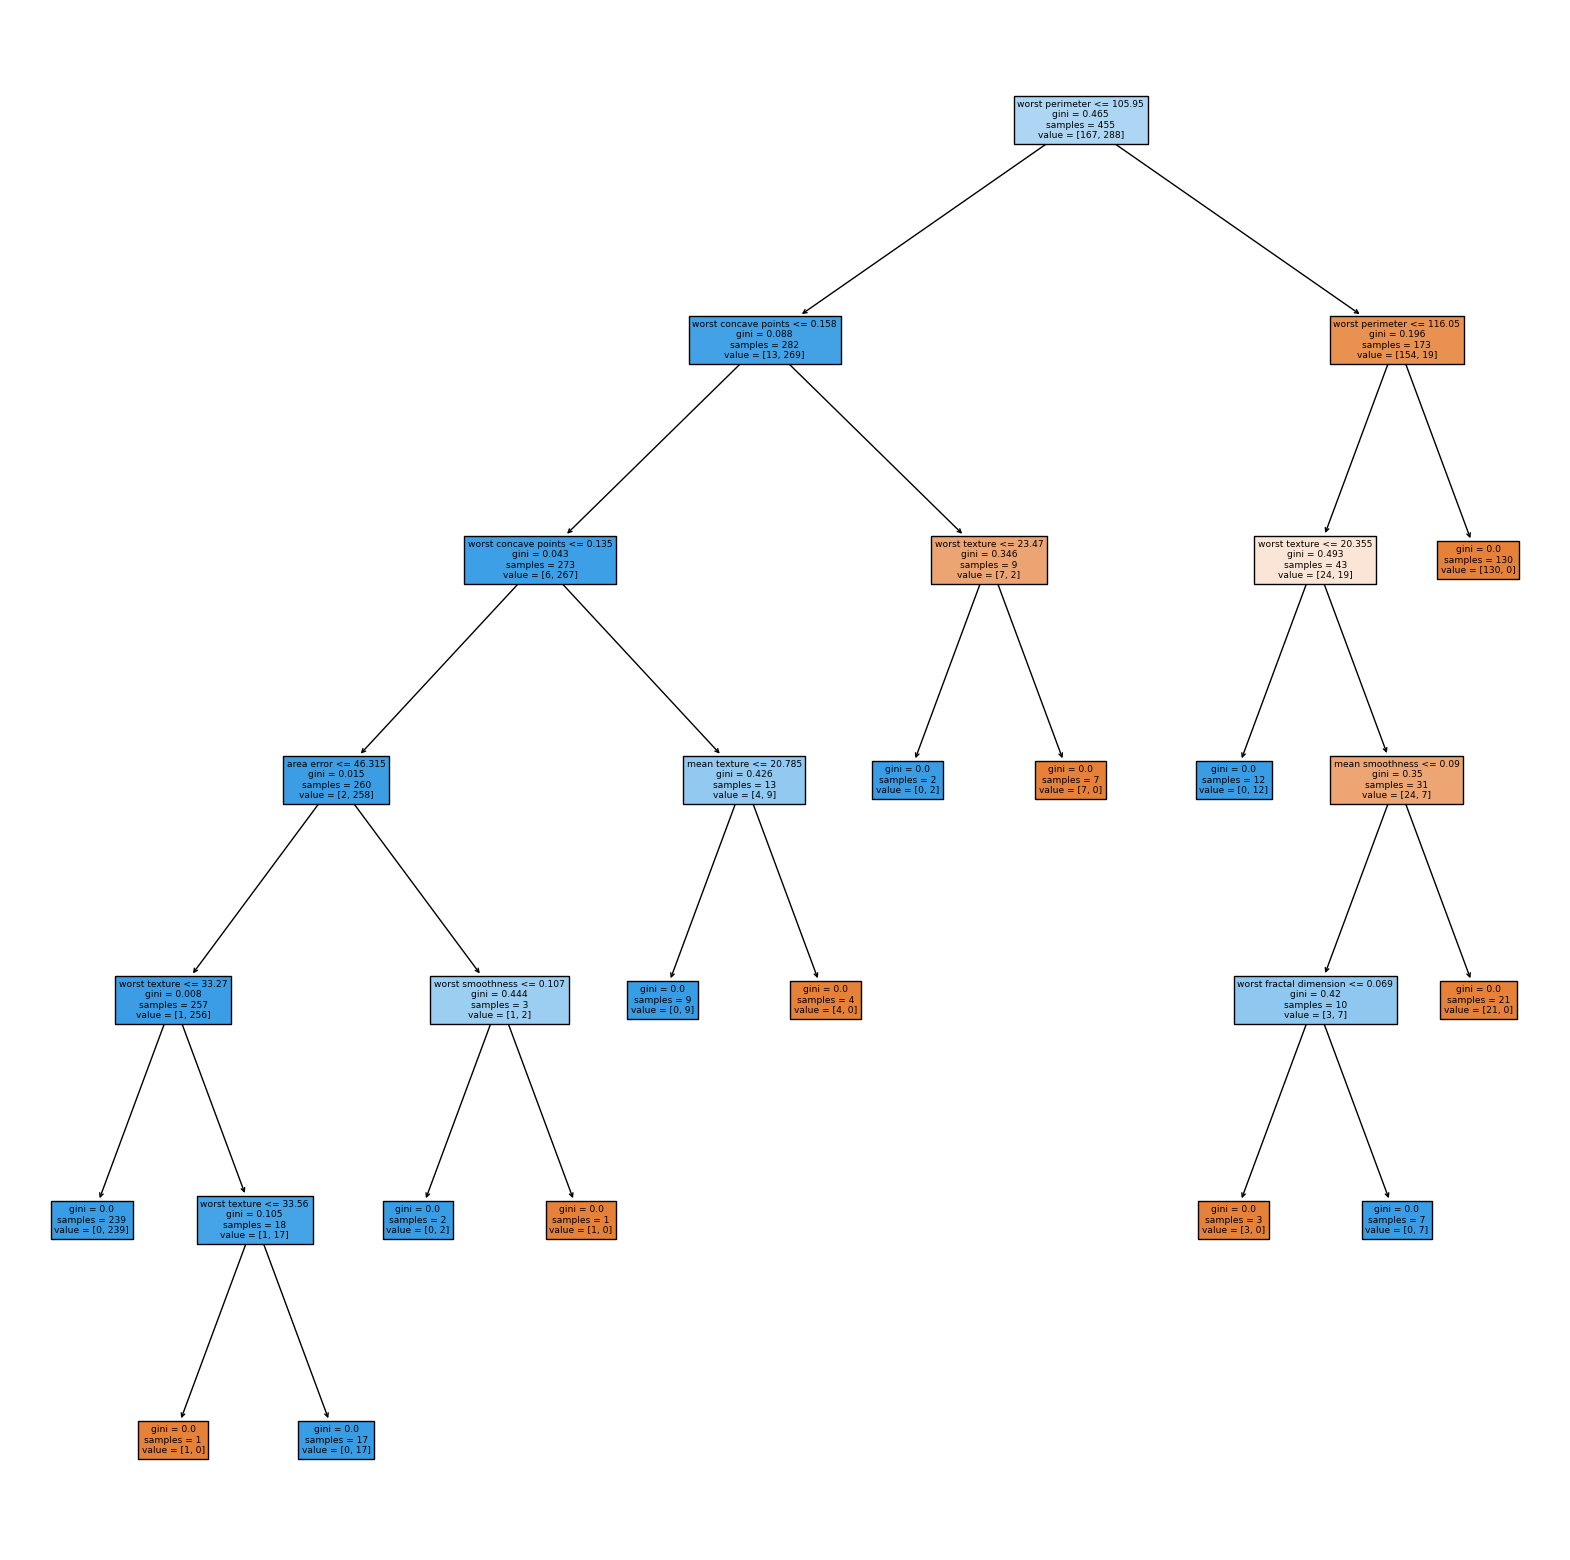

In [ ]:
from sklearn import tree

plt.figure(figsize=(20,20))
tree.plot_tree(clf, feature_names=data.feature_names, filled=True)
plt.show()

#### 隨機森林 (Random Forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 隨機森林可以計算所有特徵的 Feature importance

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

col = data.feature_names
y = rf_clf.feature_importances_

rf_importances_df = pd.DataFrame({'Feature': data.feature_names, 'Random Forest importances': rf_clf.feature_importances_})
rf_importances_df = rf_importances_df.sort_values('Random Forest importances', ascending=False).reset_index(drop=True)
rf_importances_df.style.background_gradient(cmap='Blues')

,Feature,Random Forest importances
0,worst area,0.178112
1,worst concave points,0.134933
2,mean concave points,0.082496
3,worst perimeter,0.080838
4,worst radius,0.072366
5,mean area,0.061611
6,mean perimeter,0.060930
7,mean concavity,0.057799
8,area error,0.044660
9,mean radius,0.043193


我們也可以使用隨機森林訓練完後的 Feature importance 進行特徵的篩選

In [ ]:
rf_select = SelectFromModel(RandomForestClassifier(n_estimators=100))
rf_select.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [ ]:
# get_feature_names_out 取得特徵
rf_select.get_feature_names_out()

array(['mean radius', 'mean area', 'mean concave points', 'worst radius',
       'worst perimeter', 'worst area', 'worst concavity',
       'worst concave points'], dtype=object)

In [ ]:
X_train_new = rf_select.transform(X_train)
X_test_new = rf_select.transform(X_test)

print('train shape:', X_train_new.shape)
print('test shape:', X_test_new.shape)

train shape: (455, 8)
test shape: (114, 8)


In [ ]:
# 重新 fit 一個分類器
clf = SVC(kernel='linear')
clf.fit(X_train_new, y_train)

rf_select_pred = clf.predict(X_test_new)
print(classification_report(y_true=y_test, y_pred=rf_select_pred, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.90      0.96      0.92        45
      benign       0.97      0.93      0.95        69

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



---
# 練習一: 使用下列資料集比較並整理不同特徵選取方法
[House Prices - Advanced Regression Techniques | Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)



In [ ]:
%cd /content

/content


In [ ]:
!mkdir -p house

In [ ]:
%cd house

/content/house


In [ ]:
!gdown --id 1-LIYJN6frwbjjC8K3zv57fLFyhAAxlhK

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-LIYJN6frwbjjC8K3zv57fLFyhAAxlhK
To: /content/house/house-prices-advanced-regression-techniques.zip
100% 204k/204k [00:00<00:00, 16.8MB/s]


In [ ]:
!unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
!ls

data_description.txt				 test.csv
house-prices-advanced-regression-techniques.zip  train.csv
sample_submission.csv


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import classification_report

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv('train.csv')

# Discretize target variable
data = data.drop("Id", axis=1)
data['SalePrice'] = pd.qcut(data['SalePrice'], q=3, labels=["low", "medium", "high"])

label_encoder = LabelEncoder()
target_names = ["low", "medium", "high"]

data['SalePrice'] = label_encoder.fit_transform(data['SalePrice'])

X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# Fill missing values
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[num_cols] = X[num_cols].fillna(X[num_cols].median())

# Encode categorical features
for column in X.columns:
    if X[column].dtype == object:
        encoder = LabelEncoder()
        X[column] = encoder.fit_transform(X[column])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 準備

## 使用到的資料集

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## 範例資料集: 燕尾花 (iris)
<p align="center">
<img src="https://i.imgur.com/0VZOxnf.png" width="50%"/>
</p>

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

<p align="right">
    <a href='https://www.kaggle.com/datasets/uciml/iris'>
    source
    </a>
</p>



在 PCA & tSNE 這部分使用上次課堂的 iris 資料集做範例，比較多類別可以觀察。

In [ ]:
from sklearn import datasets


iris = datasets.load_iris()

X = iris.data
y = iris.target
labels = [iris.target_names[i] for i in y]

---

# Feature Extraction

## PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit(X).transform(X)

# 這邊要注意轉換前後的欄位和資料數是一樣的
print('iris shape', X.shape)
print('iris shape', X_pca.shape)
print('explained variance ratio', pca.explained_variance_ratio_)

iris shape (569, 30)
iris shape (569, 30)
explained variance ratio [9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05 6.64883951e-06 4.01713682e-06 8.22017197e-07
 3.44135279e-07 1.86018721e-07 6.99473205e-08 1.65908880e-08
 6.99641650e-09 4.78318306e-09 2.93549214e-09 1.41684927e-09
 8.29577731e-10 5.20405883e-10 4.08463983e-10 3.63313378e-10
 1.72849737e-10 1.27487508e-10 7.72682973e-11 6.28357718e-11
 3.57302295e-11 2.76396041e-11 8.14452259e-12 6.30211541e-12
 4.43666945e-12 1.55344680e-12]


### Scree Plot

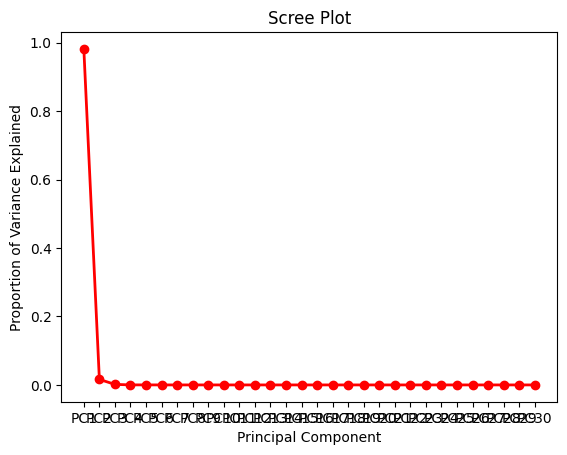

In [ ]:
PC_values = [f'PC{i}'for i in (np.arange(pca.n_components_) + 1).astype(str)]
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

### 2D

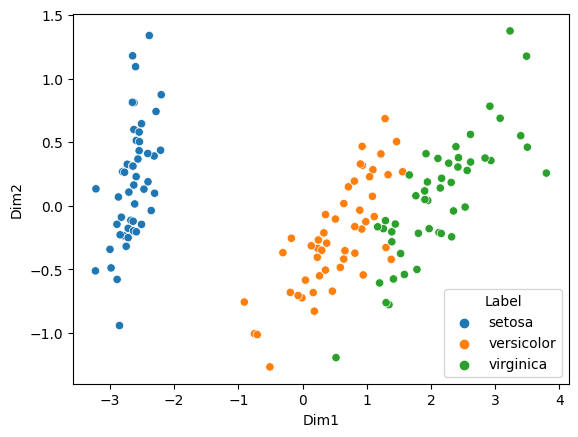

In [ ]:
df_pca = pd.DataFrame({
    "Dim1":X_pca[:,0],
    "Dim2":X_pca[:,1],
    "Label":labels
}) # 重建DataFrame

ax = sns.scatterplot(x="Dim1", y="Dim2", hue="Label",
                  data=df_pca) # 繪圖


### 3D

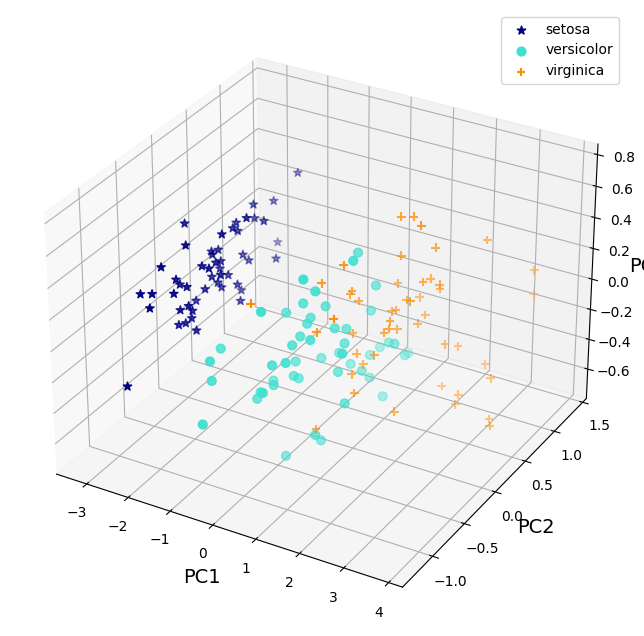

In [ ]:
pca = PCA(n_components=3)
pca.fit(X) 
X_pca = pca.transform(X) 

# 準備資料和標記
Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cdict = {0:'navy',1:'turquoise', 2:"darkorange"}
labl = {0:'setosa',1:'versicolor', 2:'virginica'}
marker = {0:'*',1:'o', 2:'+'}

# 開始畫圖
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,
           label=labl[l], marker=marker[l])
# for loop ends
ax.set_xlabel("PC1", fontsize=14)
ax.set_ylabel("PC2", fontsize=14)
ax.set_zlabel("PC3", fontsize=14)

ax.legend()
plt.show()

<p align="right">
    <a href='https://stackoverflow.com/questions/65241847/how-to-plot-3d-pca-with-different-colors'>
    source
    </a>
</p>

## tSNE
<p align="center">
    <img src="https://hackmd.io/_uploads/BJ4ZMIwN2.png" width="60%"/>
</p>




<p align="right">
    <a href='https://aihub.org.tw/platform/specialist/article/3e34f5fc-ddcb-11ea-a936-0242ac120002'>
    source
    </a>
</p>

t-SNE（t-distributed stochastic neighbor embedding，t-隨機鄰近嵌入法）是一種非線性的機器學習降維方法，由 Laurens van der Maaten 和 Geoffrey Hinton 於 2008 年提出。

**t-SNE 演算法有以下幾個特色**
- SNE（TSNE）將數據點之間的相似度轉換為概率
- t-SNE 主要是關注數據的局部結構
- t-SNE 常用來將資料投影到 2 維或 3 維的空間作定性的視覺化觀察，通過視覺化直觀的驗證某資料集或演算法的有效性。
- t-SNE的計算複雜度很高，在數百萬個樣本數據集中可能需要幾個小時，而PCA可以在幾秒鐘或幾分鐘內完成
- 算法是隨機的，具有不同種子的多次實驗可以產生不同的結果。雖然選擇loss最小的結果就行，但可能需要多次實驗以選擇超參數。

<p align="right">
    <a href='https://www.mropengate.com/2019/06/t-sne.html'>
    source 1
    </a> ,
    <a href='https://medium.com/ai%E5%8F%8D%E6%96%97%E5%9F%8E/learning-model-unsupervised-machine-learning-t-sne%E5%8F%83%E6%95%B8%E8%AC%9B%E8%A7%A3-f0b8df397b58'>
    2
    </a>
</p>




### 2D

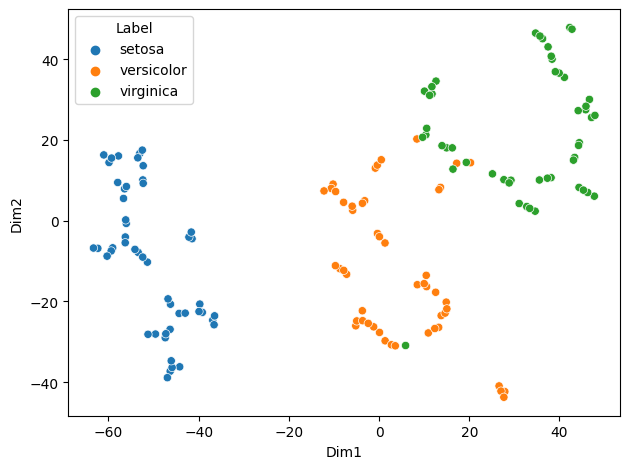

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0, perplexity=3)
iris_tsne = tsne.fit_transform(X)
df_tsne = pd.DataFrame({
    "Dim1":iris_tsne[:,0],
    "Dim2":iris_tsne[:,1],
    "Label": labels
})# 重建DataFrame
ax = sns.scatterplot(x="Dim1", y="Dim2", hue="Label",
                  data=df_tsne)# 繪圖

### 3D

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, init='pca', random_state=0, perplexity=3)
iris_tsne = tsne.fit_transform(X)

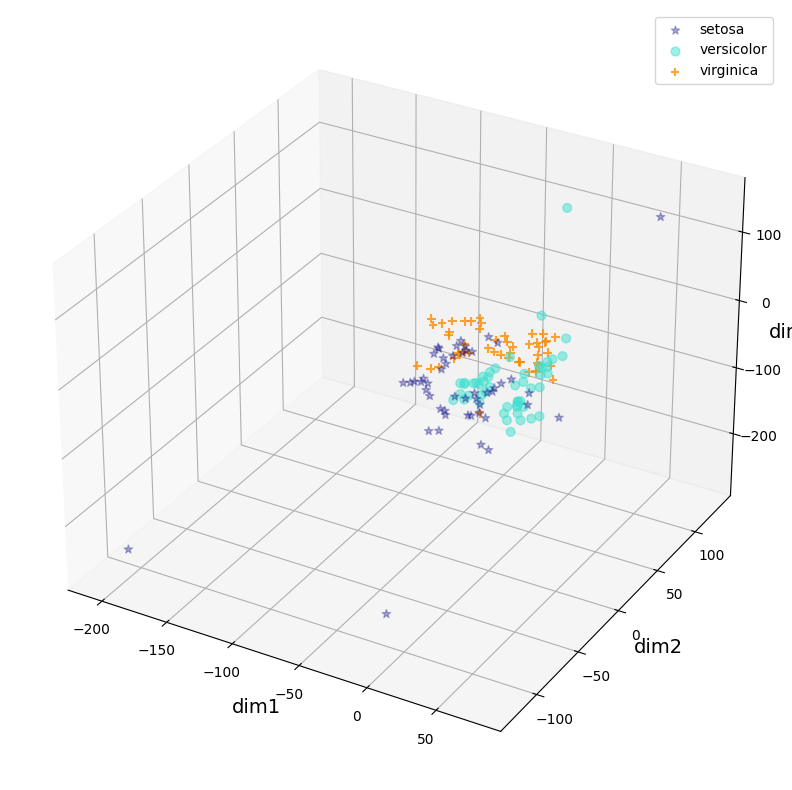

In [ ]:
# 準備資料和標記
Xax = iris_tsne[:,0]
Yax = iris_tsne[:,1]
Zax = iris_tsne[:,2]

cdict = {0:'navy',1:'turquoise', 2:"darkorange"}
label = {0:'setosa',1:'versicolor', 2:'virginica'}
marker = {0:'*',1:'o', 2:'+'}

# 開始畫圖
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,
           label=label[l], marker=marker[l])
# for loop ends
ax.set_xlabel("dim1", fontsize=14)
ax.set_ylabel("dim2", fontsize=14)
ax.set_zlabel("dim3", fontsize=14)

ax.legend()
plt.show()

### 重要參數

- perplexity 困惑度
- early exaggeration factor 前期放大係數
- learning rate 學習率
- maximum number of iterations 最大迭代次數
- angle 角度

其中，最主要是設置困惑度（perplexity），論文中提出通常困惑度在 5 ~ 50 之間，有些狀況會設置到 100 以上，一般來說，大的資料集需要更大的困惑度。困惑度可以解釋成有效鄰近樣本點數量，困惑度越大，近鄰越多，對小區域的敏感度就越小，因此可以有以下結論：

困惑度低：只有少數鄰居有影響力，可能把同分群拆成多群。
困惑度高：全局結構較明顯，但可能群與群之間會無法區分。

<p align="right">
    <a href='https://www.microsoft.com/en-us/research/blog/optimizing-barnes-hut-t-sne/'>
    source
    </a>
</p>


### 效能優化 -  Barnes-Hut t-SNE
- 效率提升，Barnes-Hut approximation 使複雜度從 O(n2)
 下降至 O(nlogn)
，讓 t-SNE 可以處理 10 萬級規模的資料。

<p align="center">
    <img src="https://1.bp.blogspot.com/-t2ewbAql4d4/XPZ1Eam0ViI/AAAAAAABfIk/6D0zN_fF8vML9DRl653QFvV4EwrjDfUGwCLcBGAs/s640/bhtsne.gif" width="60%"/>
</p>




<p align="right">
    <a href='https://www.microsoft.com/en-us/research/blog/optimizing-barnes-hut-t-sne/'>
    source
    </a>
</p>

- 在 sklearn.manifold.TSNE 的中已經預設使用此方法了，缺點是只能處理3個維度以下。

### 需要注意的點
#### **1. t-SNE 的隨機性**
t-SNE 演算法具有隨機性，多次實驗可以產生不同的結果，而一般常見 PCA 是確定性的（deterministic），每次計算後的結果相同。


#### **2. t-SNE 的解釋性** 
由於演算法本身是基於機率的特性，解釋 t-SNE 的映射時要特別注意：
- 比較兩堆的大小沒有意義：t-SNE 會根據鄰居的擁擠程度來調整區塊的大小
- 比較兩堆間的距離沒有意義：並不是靠比較近的群集彼此就比較像，該嵌入空間中的距離並沒有直覺上的距離的性質。
- t-SNE 不能用於尋找離群點：t-SNE 中的對稱項相當於把離群點拉進某群中。

因此，一般來說只可以用 t-SNE 做定性分析提出假設，不能用 t-SNE 得出結論。


#### **3. 本徵維度（intrinsic dimensionality）**

如果不能在 2D 中用 t-SNE 分群，並不一定這個資料就一定不能被模型良好區分，也有可能是 2 維不足夠表示這個資料的內部結構，也就是說原資料的本徵維度過高。


### **4. 一般 t-SNE 不適用於新資料**

PCA 降維可以適用新資料，而一般的 t-SNE 則不行。在 python sklearn library 中的 t-SNE 演算法沒有 transform() 函式。如果真的需要 transform() 方法，需要使用另一種變體：parametric t-SNE，他不包含在 sklearn library 之中。

<p align="right">
    <a href='https://www.mropengate.com/2019/06/t-sne.html'>
    source
    </a>
</p>


# 練習二: 使用 PCA & t-SNE 方法，實作手寫數字辨識資料，並視覺化結果

<p align="center">
    <img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" width="80%"/>
</p>


<p align="right">
    <a href='https://zh-yue.wikipedia.org/wiki/MNIST%E6%95%B8%E6%93%9A%E9%9B%86'>
    source
    </a>
</p>

[MNIST in CSV | Kaggle](https://www.kaggle.com/datasets/oddrationale/mnist-in-csv)


In [ ]:
%cd /content

/content


In [ ]:
!mkdir -p mnist

In [ ]:
%cd mnist

/content/mnist


In [ ]:
!gdown --id 1-M8SaDoY5ZxVuZED_ONfPwc_a3t_zXh5

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-M8SaDoY5ZxVuZED_ONfPwc_a3t_zXh5
To: /content/mnist/MNIST.zip
100% 16.0M/16.0M [00:00<00:00, 120MB/s] 


In [ ]:
!unzip MNIST.zip

Archive:  MNIST.zip
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         


In [ ]:
!ls

mnist_test.csv	mnist_train.csv  MNIST.zip


In [ ]:
train = pd.read_csv('mnist_train.csv')
test = pd.read_csv('mnist_test.csv')

In [ ]:
train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 補充



## Table of Difference between PCA and t-SNE
| S.NO. | PCA | t-SNE |
| --- | --- | --- |
| 1. | It is a linear Dimensionality reduction technique. | It is a non-linear Dimensionality reduction technique. |
| 2. | It tries to preserve the global structure of the data. | It tries to preserve the local structure(cluster) of data. |
| 3. | It does not work well as compared to t-SNE. | It is one of the best dimensionality reduction technique. |
| 4. | It does not involve Hyperparameters. | It involves Hyperparameters such as perplexity, learning rate and number of steps. |
| 5. | It gets highly affected by outliers. | It can handle outliers. |
| 6. | PCA is a deterministic algorithm. | It is a non-deterministic or randomised algorithm. |
| 7. | It works by rotating the vectors for preserving variance. | It works by minimising the distance between the point in a gaussian. |
| 8. | We can find decide on how much variance to preserve using eigen values. | We cannot preserve variance instead we can preserve distance using hyperparameters. |
| 9. | PCA is computationally less expensive than t-SNE, especially for large datasets. | t-SNE can be computationally expensive, especially for high-dimensional datasets with a large number of data points. |
| 10. | It can be used for visualization of high-dimensional data in a low-dimensional space. | It is specifically designed for visualization and is known to perform better in this regard. |
| 11. | It is suitable for linearly separable datasets. | It is more suitable for non-linearly separable datasets. |
| 12. | It can be used for feature extraction | It is mainly used for visualization and exploratory data analysis. |
| 13. | PCA can be sensitive to the ordering of the data points | t-SNE is less sensitive to the ordering of the data points. |


<p align="right">
    <a href='https://www.geeksforgeeks.org/difference-between-pca-vs-t-sne/'>
    source
    </a>
</p>


# reference
- Dataset
    - [7.1. Toy datasets — scikit-learn 1.2.2 documentation](https://scikit-learn.org/stable/datasets/toy_dataset.html)
    - [House Prices - Advanced Regression Techniques | Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)
    - [MNIST in CSV | Kaggle](https://www.kaggle.com/datasets/oddrationale/mnist-in-csv)

- Dimensionality Reduction
    - [Dimensionality Reduction Meaning, Techniques, and Examples - Spiceworks](https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-dimensionality-reduction/)
    - [What is Dimensionality Reduction? Overview, and Popular Techniques (simplilearn.com)](https://www.simplilearn.com/what-is-dimensionality-reduction-article)
    - [Dimensionality Reduction Techniques | Python (analyticsvidhya.com)](https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/)
    - [Introduction to Dimensionality Reduction for Machine Learning - MachineLearningMastery.com](https://machinelearningmastery.com/dimensionality-reduction-for-machine-learning/)
    - [11 Dimensionality reduction techniques you should know in 2021 | by Rukshan Pramoditha | Towards Data Science](https://towardsdatascience.com/11-dimensionality-reduction-techniques-you-should-know-in-2021-dcb9500d388b)
    - [What is Dimensionality Reduction? Overview, and Popular Techniques (simplilearn.com)](https://www.simplilearn.com/what-is-dimensionality-reduction-article)

- Feature Selection and Feature Extraction
    - [Feature selection revisited in the single-cell era | Genome Biology | Full Text (biomedcentral.com)](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-021-02544-3)
    - [How Does Feature Selection Benefit Machine Learning Tasks? (h2o.ai)](https://h2o.ai/wiki/feature-selection/)
    - [Pearson’s Correlation Coefficient - A Beginners Guide (analyticsvidhya.com)](https://www.analyticsvidhya.com/blog/2021/01/beginners-guide-to-pearsons-correlation-coefficient/)

- kaggle notebook
 - [Comprehensive Guide on Feature Selection | Kaggle](https://www.kaggle.com/code/prashant111/comprehensive-guide-on-feature-selection)
 - [Introduction to Feature Selection | Kaggle](https://www.kaggle.com/code/willkoehrsen/introduction-to-feature-selection)
 - [Feature Selection Techniques in Machine Learning | Kaggle](https://www.kaggle.com/code/piyushagni5/feature-selection-techniques-in-machine-learning)
 - [Feature Importance for Linear Regression: AHP Case | Kaggle](https://www.kaggle.com/code/gvyshnya/feature-importance-for-linear-regression-ahp-case/notebook)
 - [Feature Importance Case Study: AHP | Kaggle](https://www.kaggle.com/code/gvyshnya/feature-importance-case-study-ahp/notebook)
 - [6 Ways for Feature Selection | Kaggle](https://www.kaggle.com/code/sz8416/6-ways-for-feature-selection/notebook)
- example code
    - [PCA-vs-t-SNE-for-MNIST-Visualization-and-Dimensionality-reduction/PCA vs t-SNE for MNIST Visualization and Dimensionality reduction.ipynb at master · HoussemHosni/PCA-vs-t-SNE-for-MNIST-Visualization-and-Dimensionality-reduction · GitHub](https://github.com/HoussemHosni/PCA-vs-t-SNE-for-MNIST-Visualization-and-Dimensionality-reduction/blob/master/PCA%20vs%20t-SNE%20for%20MNIST%20Visualization%20and%20Dimensionality%20reduction.ipynb)
    - [Using T-SNE in Python to Visualize High-Dimensional Data Sets | Built In](https://builtin.com/data-science/tsne-python)
    - [Image Compression Using Principal Component Analysis (PCA) | by Rukshan Pramoditha | Towards Data Science](https://towardsdatascience.com/image-compression-using-principal-component-analysis-pca-253f26740a9f)
    - [Image denoising using kernel PCA — scikit-learn 1.2.2 documentation](https://scikit-learn.org/stable/auto_examples/applications/plot_digits_denoising.html#sphx-glr-auto-examples-applications-plot-digits-denoising-py)
    - [Feature Selection 特徵選取 -Filter(ㄧ) Python sklearn 實作 | by Jasmine | Medium](https://jasmine880809.medium.com/feature-selection-%E7%89%B9%E5%BE%B5%E9%81%B8%E5%8F%96-filter-%E3%84%A7-python-sklearn-%E5%AF%A6%E4%BD%9C-2797b941c6a9)

    - [Feature Selection 特徵選取 | Wrapper (二) Python sklearn 實作 | by Jasmine | Medium](https://jasmine880809.medium.com/feature-selection-%E7%89%B9%E5%BE%B5%E9%81%B8%E5%8F%96-wrapper-%E4%BA%8C-python-sklearn-%E5%AF%A6%E4%BD%9C-247a34fb2487)

    - [Feature Selection 特徵選取 | Embedded (三) Python sklearn 實作 | by Jasmine | Medium](https://jasmine880809.medium.com/feature-selection-%E7%89%B9%E5%BE%B5%E9%81%B8%E5%8F%96-embedded-%E4%B8%89-python-sklearn-%E5%AF%A6%E4%BD%9C-81618a9b5c63)
